# **Seccion 2.3.3 GANSs**


**Es necesario volver a importar libreiras, definir algunas funciones clave  y volver a llamar el dataset de fashion MNIST ya que es un cuaderno aparte**

In [1]:
#iportamos las lirerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf
from tensorflow import keras

#Llamamos los datos de Fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train_full.astype(np.float32)
X_train = X_train.reshape(-1, 28, 28, 1)/255 *2-1
X_test = X_test.astype(np.float32)
X_test = X_test.reshape(-1, 28, 28, 1)/255 *2-1
x_train = tf.concat([X_train, X_test], axis=0)
y_train = tf.concat([y_train_full, y_test], axis=0)

Using TensorFlow backend.


# **Definición y entrenamiento**

In [3]:
#Definimos el generador como un modelo secuencial vacio
generator = Sequential()
#Luego añadimos las capas necesarias
generator.add(Dense(7 * 7 * 128, input_shape=[100]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Dropout(0.5))
generator.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding="same",
                                 activation="relu",kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.015)))
generator.add(BatchNormalization())
generator.add(Dropout(0.5))
generator.add(Conv2DTranspose(64, kernel_size=3, strides=2, padding="same",
                                 activation="relu",kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.015)))
generator.add(BatchNormalization())
generator.add(Dropout(0.5))
generator.add(Conv2DTranspose(1, kernel_size=3, strides=1, padding="same",
                                 activation="tanh"))
#Y visualizammos el resumen del modelo
generator.summary()

In [5]:
#Hacemos lo mismo para la definicion del discriminador
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding="same",
                        activation=LeakyReLU(0.2),
                        input_shape=[28, 28, 1],kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.015)))
discriminator.add(BatchNormalization())
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(64, kernel_size=3, strides=1, padding="same",
                        activation=LeakyReLU(0.2),
                        input_shape=[28, 28, 1],kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.015)))
discriminator.add(BatchNormalization())
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding="same",
                        activation=LeakyReLU(0.2),kernel_initializer="he_normal"))
discriminator.add(BatchNormalization())
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))
#Y lo visualizamos
discriminator.summary()

/opt/conda/lib/python3.7/site-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [7]:
#Definimos un learning rate schedule para darle un poco de control al learning rate y poder jugar con el
learning_rate_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[100],values=[0.01,0.001])

In [8]:
#Ahora si podemos crear la GAN como un modelo secuencial combinando las 2 redes definidas anteriormente
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate_schedule),loss='binary_crossentropy')#Es necesario compilar el discriminador aparte del generador
#Esto se hace para poder manipular cuando se entrena y cuando no
#El discriminador debe aprender solo comparando las imagenes generadas y las reales, no debe entrenarse cuando el generador esta aprendiendo a generar imagenes
discriminator.trainable = False

In [9]:
#Compilar la GAN completa significa compilar para el entrenamiento donde el generador recibe feedback de lo que el discriminador determino como real o falso
GAN.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate_schedule),loss='binary_crossentropy')

In [11]:
#Definimos variables relevantes como el numero de epocas y el batch_size
epochs = 200
batch_size = 64
#esta variable va acorde a como se definio el input del generador, define la forma del ruido que se le entrega como base para la generacion de imagenes
noise_shape=100

Currently on Epoch 1
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  5.4153285920619965


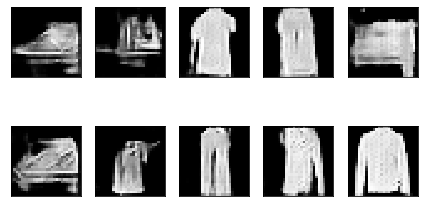

Currently on Epoch 2
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  5.541018769145012
Currently on Epoch 3
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 10

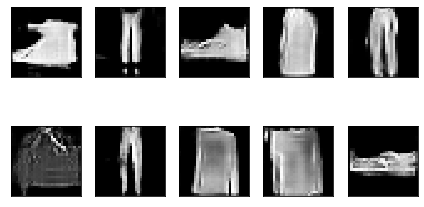

Currently on Epoch 12
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  7.843544706702232
Currently on Epoch 13
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 

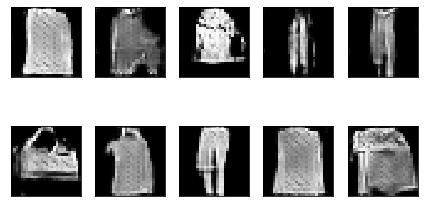

Currently on Epoch 22
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  5.2091455310583115
Currently on Epoch 23
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of

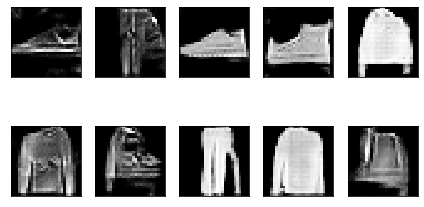

Currently on Epoch 32
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  3.8295484334230423
Currently on Epoch 33
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of

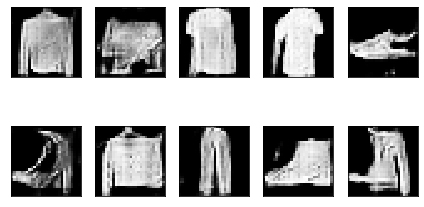

Currently on Epoch 42
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  6.171700201928616
Currently on Epoch 43
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 

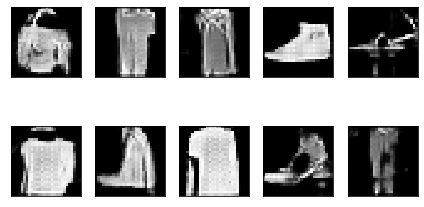

Currently on Epoch 52
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  6.902645841240883
Currently on Epoch 53
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 

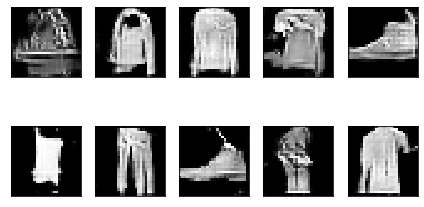

Currently on Epoch 62
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  6.278898194432259
Currently on Epoch 63
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 

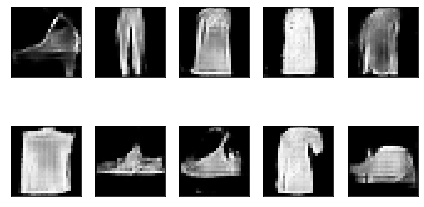

Currently on Epoch 72
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  6.263809181749821
Currently on Epoch 73
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 

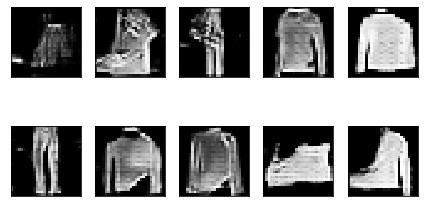

Currently on Epoch 82
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  4.401936128735542
Currently on Epoch 83
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 

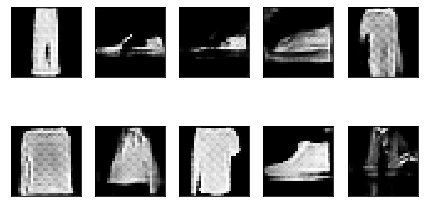

Currently on Epoch 92
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  6.9310029074549675
Currently on Epoch 93
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of

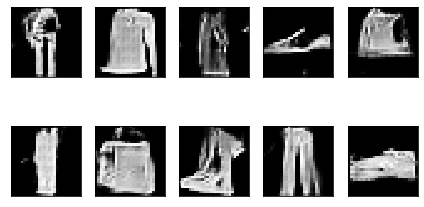

Currently on Epoch 102
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  7.246590472757816
Currently on Epoch 103
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 o

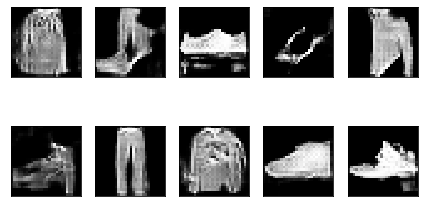

Currently on Epoch 112
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  3.985687769949436
Currently on Epoch 113
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 o

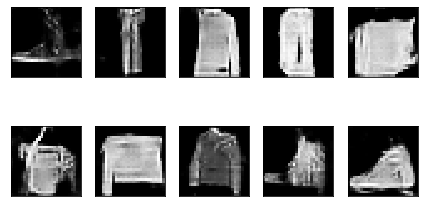

Currently on Epoch 122
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  5.415661208331585
Currently on Epoch 123
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 o

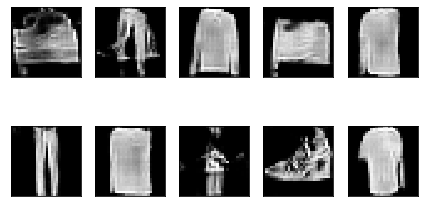

Currently on Epoch 132
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  7.214249886572361
Currently on Epoch 133
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 o

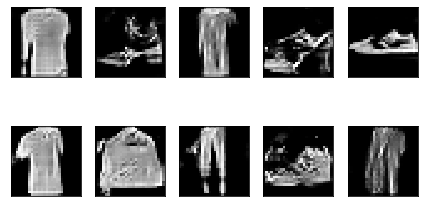

Currently on Epoch 142
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  6.415931724011898
Currently on Epoch 143
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 o

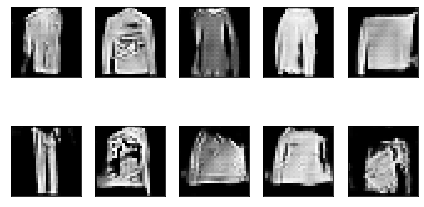

Currently on Epoch 152
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  5.970234148204327
Currently on Epoch 153
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 o

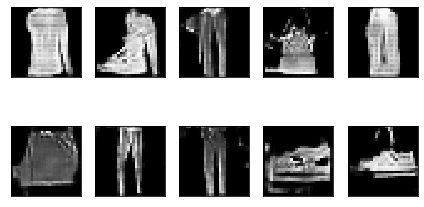

Currently on Epoch 162
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  5.863062217831612
Currently on Epoch 163
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 o

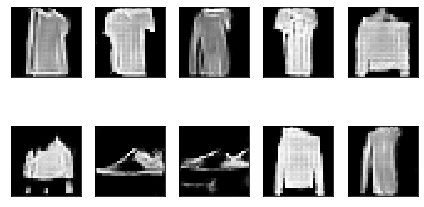

Currently on Epoch 172
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  6.074739843606949
Currently on Epoch 173
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 o

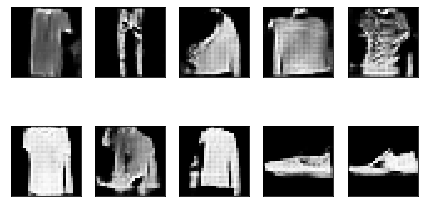

Currently on Epoch 182
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  4.42885584384203
Currently on Epoch 183
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of

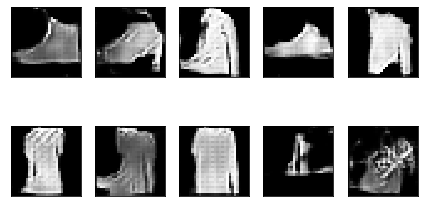

Currently on Epoch 192
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 of 1093
	Currently on batch number 200 of 1093
	Currently on batch number 250 of 1093
	Currently on batch number 300 of 1093
	Currently on batch number 350 of 1093
	Currently on batch number 400 of 1093
	Currently on batch number 450 of 1093
	Currently on batch number 500 of 1093
	Currently on batch number 550 of 1093
	Currently on batch number 600 of 1093
	Currently on batch number 650 of 1093
	Currently on batch number 700 of 1093
	Currently on batch number 750 of 1093
	Currently on batch number 800 of 1093
	Currently on batch number 850 of 1093
	Currently on batch number 900 of 1093
	Currently on batch number 950 of 1093
	Currently on batch number 1000 of 1093
	Currently on batch number 1050 of 1093
Loss:  5.807837173342705
Currently on Epoch 193
	Currently on batch number 50 of 1093
	Currently on batch number 100 of 1093
	Currently on batch number 150 o

In [14]:
#Seed para controlar la aleatoreidad del entrenamiento
tf.random.set_seed(42)
np.random.seed(42)
#Clear session para evitar que se guarde el entrenamiento por cada corrida del codigo
keras.backend.clear_session()

#definimos unas listas vacias para guardar y graficar los valores de las funciones loss
loss=[]
g_loss=[]
d_loss=[]
#Llamamos la gpu a utilizar y definimos el entrenaiento "a pedal usando un ciclo for"
with tf.device('/gpu:0'):
 for epoch in range(epochs): #REcorre el numero de epocas definido
    print(f"Currently on Epoch {epoch+1}")#Muestra la epoca actual que se esta ejecutando
    
    
    for i in range(x_train.shape[0]//batch_size):#Separa los datos en los batches
        
        if (i+1)%50 == 0:
            print(f"\tCurrently on batch number {i+1} of {x_train.shape[0]//batch_size}")#Muestra cuantos batches se han realizado y cuantos faltan en intervalos de 50
            
        noise=np.random.normal(size=[batch_size,noise_shape])#Crea el ruido para alimentar el generador
       
        gen_image = generator.predict_on_batch(noise)#Genera imagenes falsas usando el generador
        
        train_dataset = x_train[i*batch_size:(i+1)*batch_size]#Toma las imagenes del dataset por batches
       
        #Primero entrenamos el discriminador mostrandole imagenes reales
        train_label=np.ones(shape=(batch_size,1))#Define que todas las imagenes que el discriminador va a ver son reales(etiqueta 1)
        discriminator.trainable = True#Define que vamos a entrenar
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)#Le muestra al discriminador imagenes reales para que trate de predecir que lo son
        
        #Ahora entrenamos sobre imagenes falsas
        train_label=np.zeros(shape=(batch_size,1))#Define que todas las imagenes son falsas (etiqueta 0)
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)#le muestra al discriminador imagenes creadas por el generador para que trate de predecir que lo son
        
        d_=.5*d_loss_real+0.5*d_loss_fake#juntamos ambos loss en lo que seria el loss total del discriminador
        
        #Ahora entrenamos el generador
        noise=np.random.normal(size=[batch_size,noise_shape])#Creamos ruido nuevo
        train_label=np.ones(shape=(batch_size,1))#Para tratar de engañar al discriminador, decimos que estas imagenes generadas son en realidad imagenes reales del dataset paraver si las clasifica correctamente
        #Esto le da feedback al generador sobre como esta clasificando el discriminador sus imagenes y como mejorarlas 
        discriminator.trainable = False #Apagamos el entrenamiento del discriminador para que solo el generador aprenda
        
        d_g_loss_batch =GAN.train_on_batch(noise, train_label)#Le entrega ruido al generador para que genere imagenes con el feedback del discriminador, tratando de que aprenda a engañar al discriminador
        
        d_loss.append(d_)#Guardamos el loss del discriminador en la lista
        g_loss.append(d_g_loss_batch)#Guardamos el loss del generador en la lista
        batch_loss=.5*d_+.5*d_g_loss_batch#Determinamos el loss del batch con un promedio de ambos loss
        loss.append(batch_loss)#y lo guardamos en la lista del loss total
        
    print("Loss: ",loss[-1])#Visualizamos el loss en cada epoca
    #Y visualizamos imagenes generadas cada 10 epocas
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

        
        
print('Training is complete')

# **Evaluacion del loss**

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


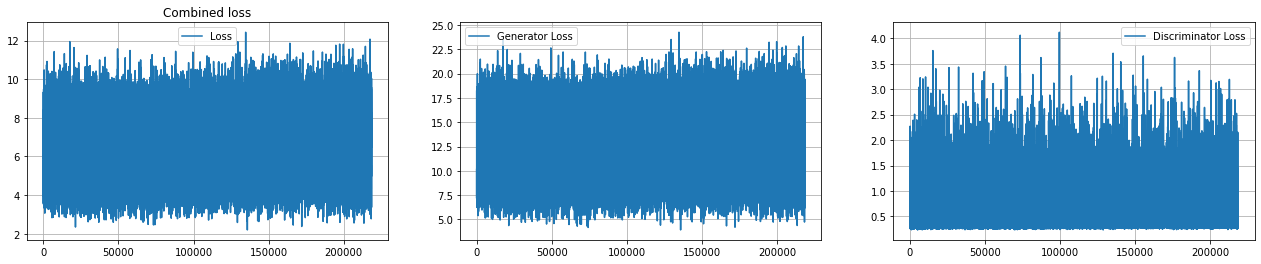

In [15]:
plt.figure(figsize=(22,4))
plt.subplot(1,3,1)
plt.plot(loss,label="Loss")
plt.title("Combined loss")
plt.grid(True)
#plt.xlim(0,20)
#plt.ylim(0,10)
plt.legend()
plt.subplot(1,3,2)
plt.plot(g_loss,label="Generator Loss")
plt.grid(True)
#plt.xlim(0,20)
#plt.ylim(0,10)
plt.legend()
plt.subplot(1,3,3)
plt.plot(d_loss,label="Discriminator Loss")
plt.grid(True)
#plt.xlim(0,20)
#plt.ylim(0,10)
plt.legend()
plt.show()

# **Vusualizacion de las predicciones**

In [16]:
noise=np.random.normal(loc=0, scale=1, size=(100,noise_shape))#Generamos ruido nuevo

gen_image = generator.predict(noise)#Le pedimos al generador que genere imagenes desde ese ruido

**Imagenes reales**

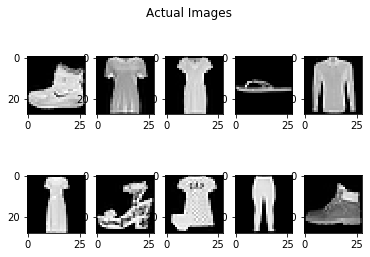

In [17]:
#Vemos in ejemplo de las imagenes reales
fig,axe=plt.subplots(2,5)
fig.suptitle("Actual Images")
plt.grid(False)
idx = 0
for i in range(2):
    for j in range(5):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=10

**Imagenes falsas**

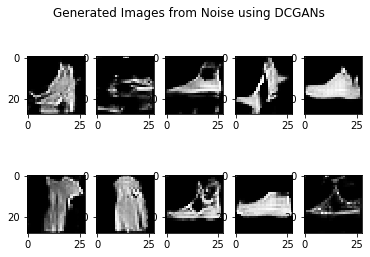

In [18]:
#Y lo comparamos con un ejemplo de las imagenes falsas
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using DCGANs')
idx=0
for i in range(2):
     for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=3

# **Discusion**

Introduction of deep convolution GAN helps in improving the variation in the output data and prevents the model from being stuck on single type of image. The interesting fact here seems that the generator being capable of creating meaningful images from noise inputs without even itself seeing the actual images and that's what makes GANS so interesting.